In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras import models, layers, optimizers, utils
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2113536/2110848 [==============================] - 13s 6us/step


In [5]:
print(len(train_data))
print(len(test_data))

8982
2246


In [6]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [7]:
# Preparing Data Set
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [11]:
#OR
one_hot_train_labels = utils.to_categorical(train_labels)
one_hot_test_labels = utils.to_categorical(test_labels)

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [13]:
# Building Model
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [14]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 413us/sample - loss: 2.5689 - accuracy: 0.5090 - val_loss: 1.7084 - val_accuracy: 0.6440
Epoch 2/20
7982/7982 [==============================] - 2s 217us/sample - loss: 1.4031 - accuracy: 0.7052 - val_loss: 1.3067 - val_accuracy: 0.7140
Epoch 3/20
7982/7982 [==============================] - 2s 213us/sample - loss: 1.0452 - accuracy: 0.7726 - val_loss: 1.1488 - val_accuracy: 0.7400
Epoch 4/20
7982/7982 [==============================] - 2s 214us/sample - loss: 0.8240 - accuracy: 0.8173 - val_loss: 1.0366 - val_accuracy: 0.7740
Epoch 5/20
7982/7982 [==============================] - 2s 217us/sample - loss: 0.6581 - accuracy: 0.8589 - val_loss: 0.9687 - val_accuracy: 0.8010
Epoch 6/20
7982/7982 [==============================] - 2s 212us/sample - loss: 0.5295 - accuracy: 0.8880 - val_loss: 0.9374 - val_accuracy: 0.8140
Epoch 7/20
7982/7982 [==============================] - 2s 223us

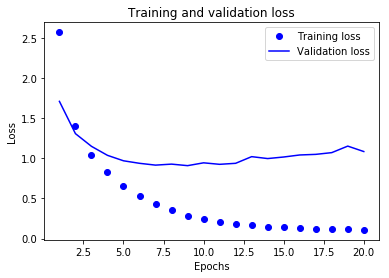

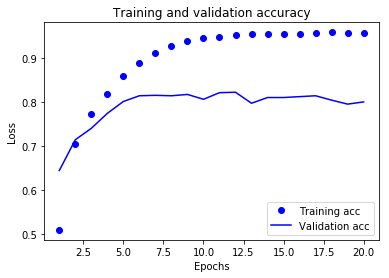

In [15]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
predictions = model.predict(x_test)

In [17]:
predictions

array([[2.6939633e-06, 1.3820789e-05, 4.5821727e-07, ..., 4.8002858e-07,
        1.9493640e-08, 2.2022648e-07],
       [4.2551562e-02, 8.0158241e-04, 1.1781808e-03, ..., 1.5622693e-06,
        5.9263549e-08, 5.4376942e-05],
       [4.2421192e-02, 5.1996195e-01, 4.0066126e-03, ..., 1.0766733e-04,
        3.6612141e-06, 4.7792238e-03],
       ...,
       [5.6911631e-07, 2.3802131e-06, 4.3845835e-06, ..., 8.6303822e-07,
        3.3970753e-07, 2.1321965e-07],
       [2.7124120e-03, 5.0329708e-02, 2.7853388e-03, ..., 2.3969229e-04,
        7.3444075e-06, 8.2585996e-04],
       [2.1448485e-03, 7.9721886e-01, 1.2175912e-02, ..., 3.1920530e-07,
        4.0051557e-07, 8.1025981e-05]], dtype=float32)

In [18]:
predictions.shape

(2246, 46)

In [20]:
predictions[1].sum()

0.9999998

In [21]:
predictions[1].argmax()

10